<a href="https://colab.research.google.com/github/fateme-alk/learning/blob/main/regression/practice_model_development_laptops_jupyterlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Coursera - Data Analysis with Python <br>
https://www.coursera.org/learn/data-analysis-with-python

# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [3]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0, index_col=False)

In [4]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe")
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price-binned',
       'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [7]:
df.shape

(238, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   GPU               238 non-null    int64  
 3   OS                238 non-null    int64  
 4   CPU_core          238 non-null    int64  
 5   Screen_Size_inch  238 non-null    float64
 6   CPU_frequency     238 non-null    float64
 7   RAM_GB            238 non-null    int64  
 8   Storage_GB_SSD    238 non-null    int64  
 9   Weight_pounds     238 non-null    float64
 10  Price             238 non-null    int64  
 11  Price-binned      238 non-null    object 
 12  Screen-Full_HD    238 non-null    int64  
 13  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 26.2+ KB


# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


## My Solution

In [15]:
predictor_train, predictor_test, actual_target_train, actual_target_test = train_test_split(df[['CPU_frequency']], df['Price'])

In [16]:
for var in [predictor_train, predictor_test, actual_target_train, actual_target_test]:
    print(type(var))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [17]:
# Write your code below and press Shift+Enter to execute
slr = LinearRegression()

In [18]:
slr

LinearRegression()

In [19]:
slr.fit(predictor_train, actual_target_train)

LinearRegression()

In [20]:
predicted_target_train = slr.predict(predictor_train)

In [21]:
predicted_target_test = slr.predict(predictor_test)

In [22]:
resid_train = actual_target_train - predicted_target_train

In [23]:
resid_test = actual_target_test - predicted_target_test

In [24]:
resid_train

,Price
156,579.888352
165,32.252943
81,-35.656784
4,-340.563013
181,384.252943
...,...
215,481.343216
69,-512.747057
115,-234.111648
230,304.252943


In [25]:
resid_test

,Price
65,-784.656784
126,-35.563013
84,19.343216
160,86.162670
10,-202.563013
30,-161.656784
146,-725.656784
148,220.888352
88,-112.747057
172,-555.747057


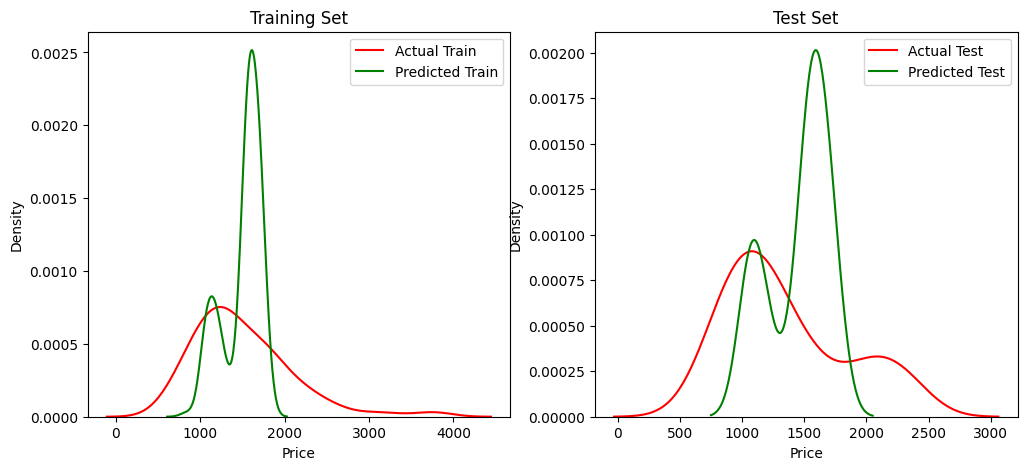

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.kdeplot(actual_target_train, color='red', label='Actual Train')
sns.kdeplot(predicted_target_train, color='green', label='Predicted Train')
plt.title("Training Set")
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.kdeplot(actual_target_test, color='red', label='Actual Test')
sns.kdeplot(predicted_target_test, color='green', label='Predicted Test')
plt.title("Test Set")
plt.legend()

In [31]:
print(mean_squared_error(actual_target_train, predicted_target_train))
print(r2_score(actual_target_train, predicted_target_train))

305087.1310173876
0.13983960221436287


In [32]:
print(mean_squared_error(actual_target_test, predicted_target_test))
print(r2_score(actual_target_test, predicted_target_test))

227601.2761307665
0.03253513339690195


## IBM Solution

In [9]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


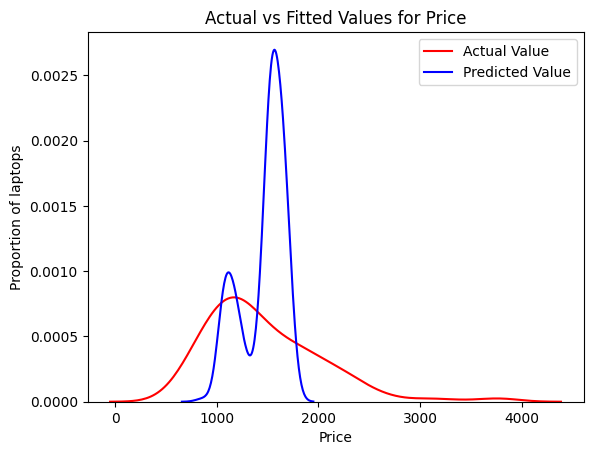

In [10]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()


Evaluate the Mean Squared Error and R^2 score values for the model.


In [11]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.


## My Solution

In [9]:
predictors = ['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']

In [10]:
type(df[predictors])

pandas.core.frame.DataFrame

In [11]:
predictors_train, predictors_test, actual_target_train, actual_target_test = train_test_split(df[predictors], df['Price'])

In [12]:
mlr = LinearRegression()

In [13]:
mlr

LinearRegression()

In [15]:
mlr.fit(predictors_train, actual_target_train)

LinearRegression()

In [16]:
predicted_target_train = mlr.predict(predictors_train)

In [17]:
predicted_target_test = mlr.predict(predictors_test)

In [18]:
resid_train = actual_target_train - predicted_target_train
resid_test = actual_target_test - predicted_target_test

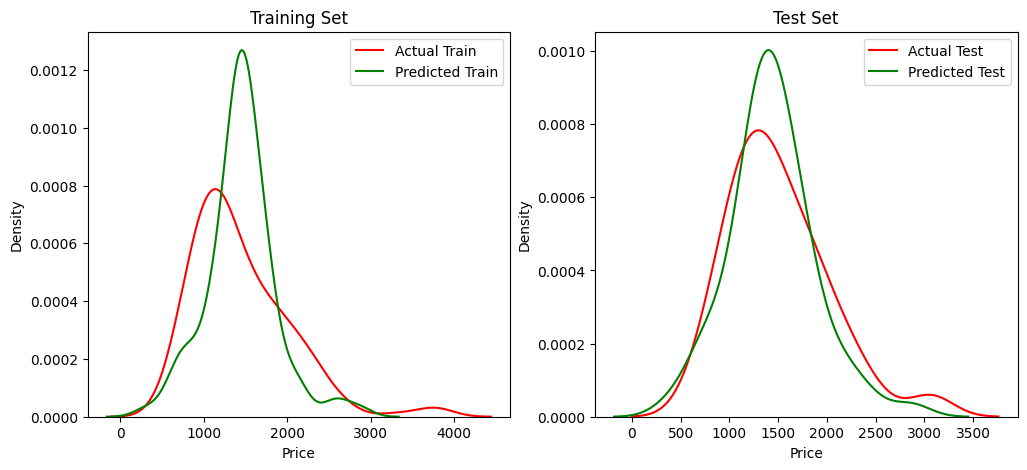

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.kdeplot(actual_target_train, color='red', label='Actual Train')
sns.kdeplot(predicted_target_train, color='green', label='Predicted Train')
plt.title("Training Set")
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.kdeplot(actual_target_test, color='red', label='Actual Test')
sns.kdeplot(predicted_target_test, color='green', label='Predicted Test')
plt.title("Test Set")
plt.legend()

In [20]:
print(mean_squared_error(actual_target_train, predicted_target_train))
print(r2_score(actual_target_train, predicted_target_train))

180860.8624953131
0.4825418937388616


In [21]:
print(mean_squared_error(actual_target_test, predicted_target_test))
print(r2_score(actual_target_test, predicted_target_test))

111237.89656003672
0.5802391481733667


## IBM Solution

In [15]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

Plot the Distribution graph of the predicted values as well as the Actual values


In [16]:

mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)


The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


Text(0, 0.5, 'Proportion of laptops')

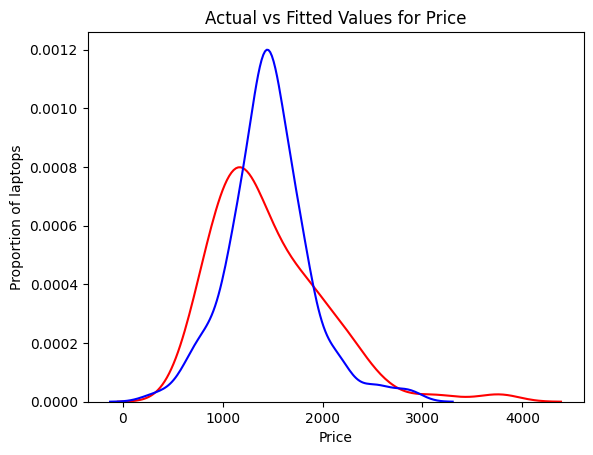

In [17]:
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`.


## My Solution

In [24]:
coefficients = np.polyfit(df['CPU_frequency'], df['Price'], 2)
equation = np.poly1d(coefficients)
print(equation)

           2
1.191e+04 x - 1.643e+04 x + 6703


<Axes: xlabel='CPU_frequency', ylabel='Price'>

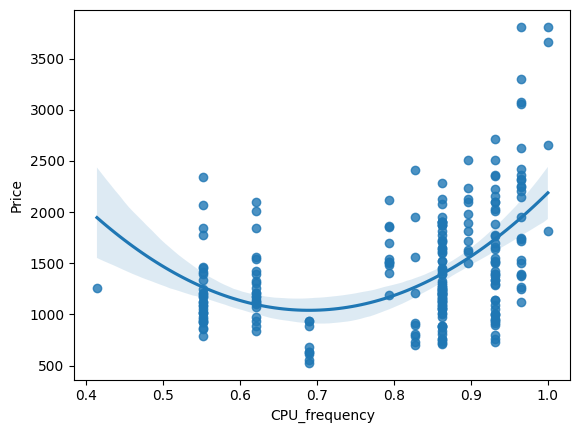

In [25]:
sns.regplot(df, x='CPU_frequency', y='Price', order=2)

## IBM Solution

In [10]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [13]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


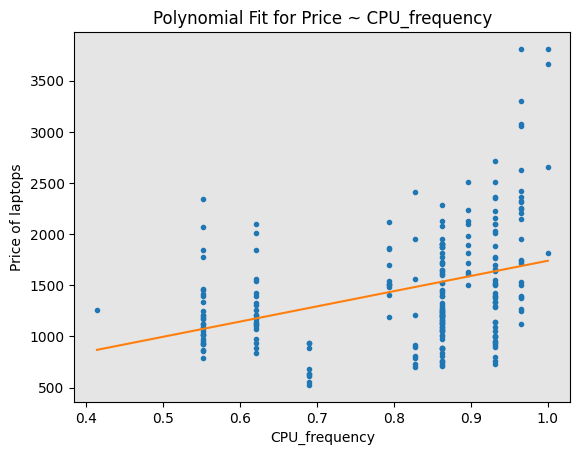

In [17]:
# Call for function of degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

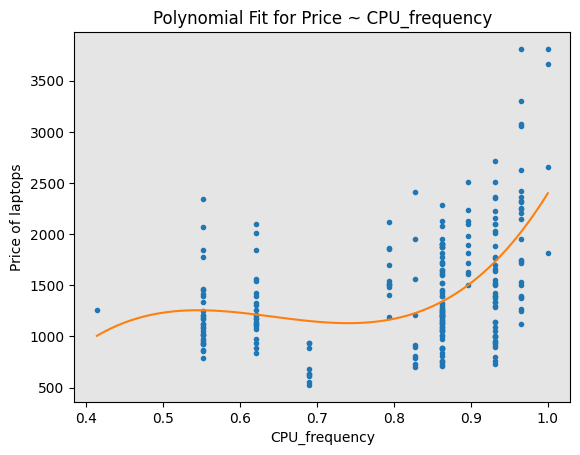

In [18]:
# Call for function of degree 3
PlotPolly(p3, X, Y, 'CPU_frequency')

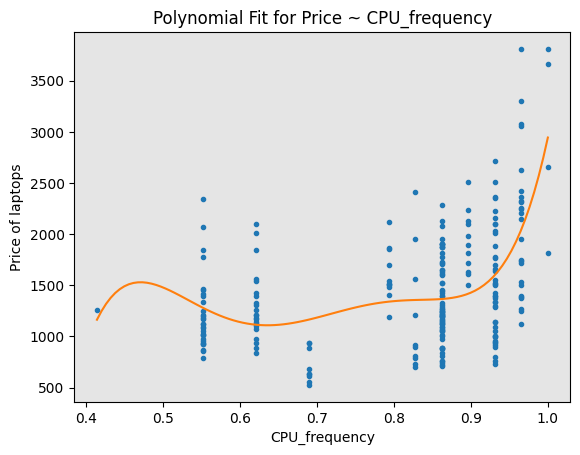

In [19]:
# Call for function of degree 5
PlotPolly(p5, X, Y, 'CPU_frequency')

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [20]:
#  Write your code below and press Shift+Enter to execute
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531175
The MSE value for 3rd degree polynomial is:  241024.86303848747
The R-square value for 5th degree polynomial is:  0.3030822706443108
The MSE value for 5th degree polynomial is:  229137.2954805611


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline.


## My Solution

## IBM Solution

In [ ]:
#  Write your code below and press Shift+Enter to execute


<details>
    <summary>Click here for Solution</summary>
    
```python
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
```

</details>


Evaluate the MSE and R^2 values for the this predicted output.


In [ ]:
#  Write your code below and press Shift+Enter to execute


<details>
    <summary>Click here for Solution</summary>
    
```python
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

```

</details>


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


### Copyright ©IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|--!>
